### 보험료 예측
> https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

#### Features
1. age - 나이
2. sex - 성별
3. bmi - bmi
4. children - 자식 수
5. smoker - 습연 여부
6. region - 지역
7. expense - 금액(target)

In [1]:
import pandas as pd

i_df_origin = pd.read_csv('./datasets/insurance.csv')
i_df = i_df_origin.copy()
i_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [2]:
i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 결측치 확인

In [3]:
i_df.isna().sum(0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- 중복행 확인

In [4]:
i_df.duplicated().sum()

1

- 중복행 제거

In [5]:
i_df = i_df.drop_duplicates()

In [6]:
i_df.duplicated().sum()

0

In [7]:
i_df.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [8]:
i_df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [9]:
i_df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [10]:
i_df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [11]:
pre_i_df = i_df.loc[:, ['age', 'bmi', 'children', 'expenses']]
pre_i_df

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

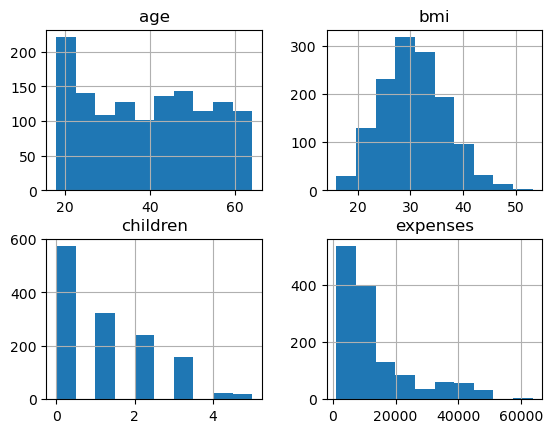

In [12]:
pre_i_df.hist()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

- LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 139834077.0931, RMSE: 11825.1460, MSLE: 0.7987, RMSLE: 0.8937, R2: 0.1234


- PolynomialFeatures

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 140795243.3328, RMSE: 11865.7171, MSLE: 0.8100, RMSLE: 0.9000, R2: 0.1174


#### R2스코어가 0.1정도밖에 되지 않아 우선 타겟데이터의 분포가 맞지 않는것을 확인하여서 타겟데이터 로그변환

In [18]:
import numpy as np

pre_i_df.loc[:, 'expenses'] = np.log1p(pre_i_df.expenses)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [20]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6149, RMSE: 0.7842, MSLE: 0.0060, RMSLE: 0.0772, R2: 0.2998


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [28]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6213, RMSE: 0.7882, MSLE: 0.0060, RMSLE: 0.0775, R2: 0.2926


- 타겟데이터 분포를 조금 맞추고 나니 LinearRegression의 R2가 거의 0.3에 가까워졌다

- 범주형 데이터 추가

In [30]:
i_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


- 범주형 데이터 레이블 인코딩

In [31]:
from sklearn.preprocessing import LabelEncoder

columns = ['sex', 'children', 'smoker', 'region']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    i_df[column] = encoder.fit_transform(i_df[column])
    encoders[column] = encoder.classes_.tolist()

C:\Users\user\AppData\Local\Temp\ipykernel_7568\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df[column] = encoder.fit_transform(i_df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_7568\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df[column] = encoder.fit_transform(i_df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_7568\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [37]:
import numpy as np

i_df.loc[:, 'expenses'] = np.log1p(i_df.expenses)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0021, RMSE: 0.0462, MSLE: 0.0002, RMSLE: 0.0139, R2: 0.7566


In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [52]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0015, RMSE: 0.0386, MSLE: 0.0001, RMSLE: 0.0117, R2: 0.8303


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [55]:
from statsmodels.api import OLS

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              8544.
Date:                Thu, 09 May 2024   Prob (F-statistic):                        0.00
Time:                        09:43:37   Log-Likelihood:                         -558.74
No. Observations:                1337   AIC:                                      1129.
Df Residuals:                    1331   BIC:                                      1161.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
get_vif(features)

,vif_score,feature
0,7.558648,age
1,2.000026,sex
2,10.378835,bmi
3,1.801974,children
4,1.257158,smoker
5,2.924066,region


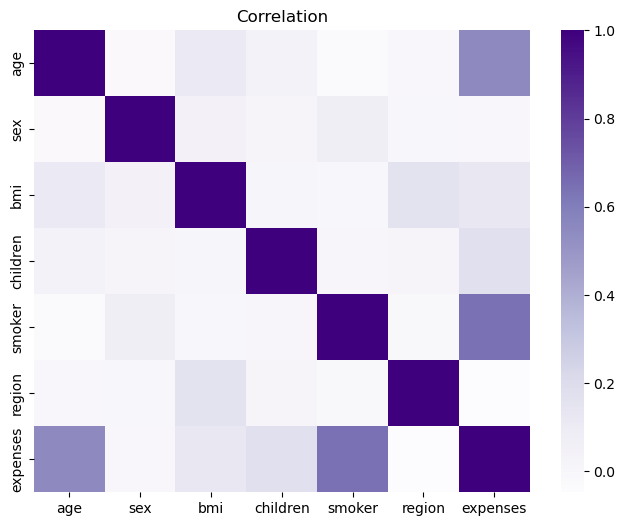

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = i_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [47]:
corr['expenses'].sort_values(ascending=False)[1:]

smoker      0.641253
age         0.546425
children    0.172015
bmi         0.125984
sex        -0.000210
region     -0.047248
Name: expenses, dtype: float64

In [48]:
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,0.001626,0.546425
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,0.004936,-0.000210
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,0.157448,0.125984
children,0.041536,0.017848,0.012641,1.000000,0.007331,0.016258,0.172015
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,-0.002358,0.641253
region,0.001626,0.004936,0.157448,0.016258,-0.002358,1.000000,-0.047248
expenses,0.546425,-0.000210,0.125984,0.172015,0.641253,-0.047248,1.000000


- 타겟과의 상관관계가 낮은 피쳐들이 많지만 결과가 잘 나와서 보류

In [53]:
from statsmodels.api import OLS

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              8544.
Date:                Thu, 09 May 2024   Prob (F-statistic):                        0.00
Time:                        09:43:11   Log-Likelihood:                         -558.74
No. Observations:                1337   AIC:                                      1129.
Df Residuals:                    1331   BIC:                                      1161.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [99]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0021, RMSE: 0.0462, MSLE: 0.0002, RMSLE: 0.0139, R2: 0.7566


In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# cross_val_score로 교차검증(cross_val_score이 알아서 데이터를 분리하여서 교차검증을 해준다)
score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.75096


- LinearRegression과 교차검증 후 R2스코어가 거의 비슷하게 0.75가 나왔다

#### Pytorch

In [150]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(6, 1)

    def forward(self, x):
        return self.linear(x)

In [157]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

print(X_train.shape, y_train.shape)

l_r = LinearRegressionModel()
# print(l_r)
optimizer = SGD(l_r.parameters(), lr=1e-6)

epochs = 1500000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(l_r.parameters())[1].item(), 6)}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

torch.Size([1069, 6]) torch.Size([1069, 1])
Epoch: 100000/1500000
W1: 0.0155, W2: 0.1068, W3: 0.0682, W4: -0.0004, W5: 0.0165, W6: -0.2454, b: -0.144088
Loss: 0.2456
Epoch: 200000/1500000
W1: 0.0152, W2: 0.1087, W3: 0.0648, W4: 0.0159, W5: 0.0238, W6: -0.189, b: -0.129777
Loss: 0.2082
Epoch: 300000/1500000
W1: 0.015, W2: 0.1102, W3: 0.062, W4: 0.0275, W5: 0.0308, W6: -0.1444, b: -0.116067
Loss: 0.1844
Epoch: 400000/1500000
W1: 0.0148, W2: 0.1117, W3: 0.0597, W4: 0.0358, W5: 0.0375, W6: -0.1093, b: -0.102656
Loss: 0.169
Epoch: 500000/1500000
W1: 0.0146, W2: 0.1124, W3: 0.0579, W4: 0.0416, W5: 0.0438, W6: -0.0816, b: -0.089245
Loss: 0.1587
Epoch: 600000/1500000
W1: 0.0145, W2: 0.1131, W3: 0.0564, W4: 0.0457, W5: 0.0498, W6: -0.0597, b: -0.075834
Loss: 0.1516
Epoch: 700000/1500000
W1: 0.0143, W2: 0.1139, W3: 0.0552, W4: 0.0485, W5: 0.0556, W6: -0.0424, b: -0.063045
Loss: 0.1465
Epoch: 800000/1500000
W1: 0.0142, W2: 0.1146, W3: 0.0541, W4: 0.0504, W5: 0.0612, W6: -0.0288, b: -0.050253
Loss

In [197]:
import numpy as np
from sklearn.metrics import r2_score

H = l_r(X_test)
loss = mse_loss(y_test, H)
r2 = r2_score(y_test.detach(), H.detach())

print(r2)
# loss값
print(loss.item())
# loss값에 제곱근
print(np.sqrt(loss.item()))

print("="*40)
for i in range(1, len(list(y_test))):
    print('예측: ', np.round(y_test.detach().tolist()[i], 4), '정답:', np.round(H.tolist()[i], 4), \
          '오차:', np.round((H.tolist()[i][0] - y_test.detach().tolist()[i][0]), 4))

-17.22399872279641
0.1596173346042633
0.39952138191123554
예측:  [2.4419] 정답: [2.3745] 오차: -0.0674
예측:  [2.1813] 정답: [1.4231] 오차: -0.7582
예측:  [2.346] 정답: [2.1002] 오차: -0.2458
예측:  [2.0854] 정답: [2.5601] 오차: 0.4747
예측:  [2.327] 정답: [2.47] 오차: 0.143
예측:  [2.3625] 정답: [2.5205] 오차: 0.158
예측:  [2.2598] 정답: [2.2105] 오차: -0.0492
예측:  [2.336] 정답: [3.4112] 오차: 1.0752
예측:  [2.2715] 정답: [1.9883] 오차: -0.2832
예측:  [2.4574] 정답: [2.6675] 오차: 0.2101
예측:  [2.1348] 정답: [1.2175] 오차: -0.9173
예측:  [2.2628] 정답: [2.1559] 오차: -0.1069
예측:  [2.3371] 정답: [2.4355] 오차: 0.0984
예측:  [2.322] 정답: [1.8859] 오차: -0.4361
예측:  [2.3054] 정답: [2.4953] 오차: 0.1899
예측:  [2.3496] 정답: [2.2462] 오차: -0.1034
예측:  [2.2292] 정답: [2.6968] 오차: 0.4676
예측:  [2.2252] 정답: [1.8602] 오차: -0.3651
예측:  [2.4174] 정답: [2.4623] 오차: 0.0449
예측:  [2.3333] 정답: [2.1916] 오차: -0.1417
예측:  [2.3221] 정답: [2.0972] 오차: -0.2249
예측:  [2.2459] 정답: [2.482] 오차: 0.2361
예측:  [2.2508] 정답: [2.0402] 오차: -0.2105
예측:  [2.3324] 정답: [2.3647] 오차: 0.0323
예측:  [2.3557] 정답: [2.5754]